#### Arbitary Imputation

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Titanic_train.csv',usecols=['Fare','Age','Survived'])

In [3]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
dataset.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

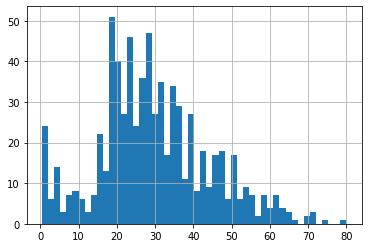

In [5]:
dataset['Age'].hist(bins=50)

In [6]:
def impute_arbitary(dataset,feature):
    dataset[feature+'_One']=dataset[feature].fillna(1)
    dataset[feature+'_Hundred']=dataset[feature].fillna(100)

In [7]:
impute_arbitary(dataset,'Age')

In [8]:
dataset.head()

,Survived,Age,Fare,Age_One,Age_Hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [9]:
dataset.isnull().mean()

Survived       0.000000
Age            0.198653
Fare           0.000000
Age_One        0.000000
Age_Hundred    0.000000
dtype: float64

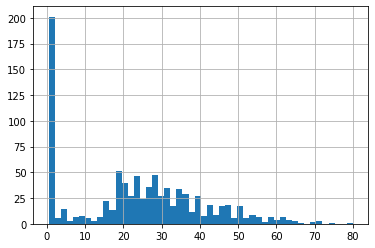

In [10]:
dataset['Age_One'].hist(bins=50)

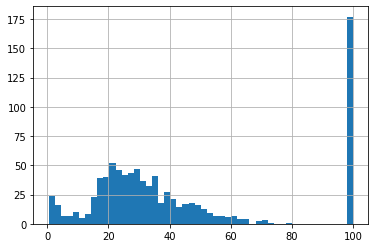

In [11]:
dataset['Age_Hundred'].hist(bins=50)

#### Advantage

1. Easy to implement
2. Capture the importance of missingness.

#### Disadvantage

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use



In [12]:
print(dataset['Age'].std())
print(dataset['Age_One'].std())
print(dataset['Age_Hundred'].std())

14.526497332334044
17.329597683998042
30.930372890173594


## Handling Categorical Missing Data

#### Frequent Category imputation

In [13]:
dataset=pd.read_csv('train.csv')

In [14]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
dataset.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
dataset=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [17]:
dataset.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
dataset.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [19]:
dataset.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Ploting the bar graph of each feature 

 There is two Method
1. By Value count 
2. By Groupby method

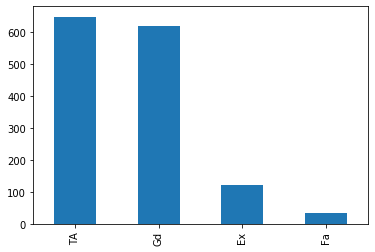

In [20]:
# 1. By Value Count
dataset['BsmtQual'].value_counts().plot.bar()

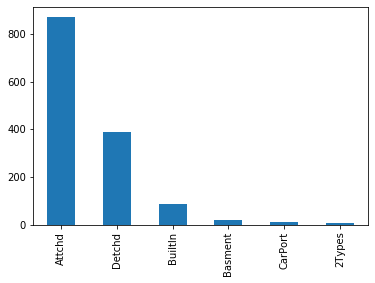

In [21]:
dataset['GarageType'].value_counts().plot.bar()

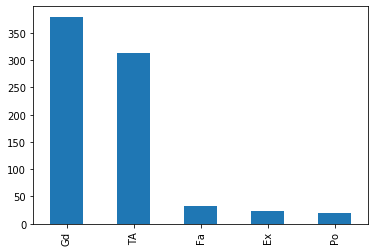

In [22]:
dataset['FireplaceQu'].value_counts().plot.bar()

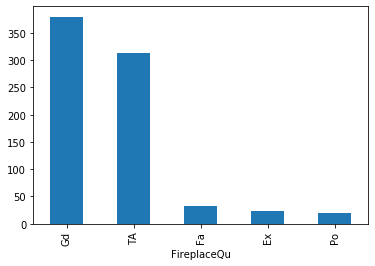

In [23]:
# 2.By groupby method

dataset.groupby('FireplaceQu')['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

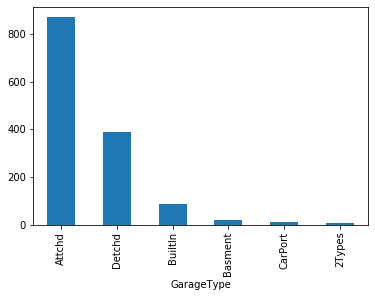

In [24]:
dataset.groupby('GarageType')['GarageType'].count().sort_values(ascending=False).plot.bar()

#### There is two method  to find the most frequent category

1. By mode function
2. By value_counts() 

In [25]:
#1. By mode function

dataset['GarageType'].mode()
# This returns the row 
# Now we have to take the value of this first row

0    Attchd
dtype: object

In [26]:
dataset['GarageType'].mode()[0]

'Attchd'

In [27]:
# 2. By value_counts()

dataset['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [28]:
dataset['GarageType'].value_counts().index

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [29]:
dataset['GarageType'].value_counts().index[0]

'Attchd'

In [30]:
## Creating the frequent category imputation

def frequent_category_imputation(dataset,feature):
    most=dataset[feature].mode()[0]
    dataset[feature].fillna(most,inplace=True)

In [31]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    frequent_category_imputation(dataset,feature)

In [32]:
dataset.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

##### Advantage

1. Easy to implement
2. Faster way to implement

##### Disadvantage

1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label


#### Adding a variable to capture nan

In [33]:
df=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [34]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
df.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [36]:
import numpy as np
def capture_nan_and_impute(data,feature):
    most_frequent=data[feature].mode()[0]
    data[feature].fillna(most_frequent,inplace=True)
    data[feature+'_nan']=np.where(data[feature].isnull(),1,0)

In [37]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    capture_nan_and_impute(df,feature)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan,GarageType_nan
0,Gd,Gd,Attchd,208500,0,0,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [39]:
df.isnull().mean()

BsmtQual           0.0
FireplaceQu        0.0
GarageType         0.0
SalePrice          0.0
BsmtQual_nan       0.0
FireplaceQu_nan    0.0
GarageType_nan     0.0
dtype: float64

#### Suppose if you  have more number of frequent categories then we create a new category Missing instead of nan 

In [40]:
data=pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])


In [41]:
import numpy as np
def impute_missing(data,feature):
    data[feature+'_miss']=np.where(data[feature].isnull(),"Missing",data[feature])

In [42]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_missing(data,feature)

In [43]:
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_miss,FireplaceQu_miss,GarageType_miss
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [44]:
data=data.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [45]:
data.head()

,SalePrice,BsmtQual_miss,FireplaceQu_miss,GarageType_miss
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### One Hot encoding

In [47]:
data=pd.read_csv('Titanic_train.csv',usecols=['Sex'])


In [48]:
data.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [53]:
pd.get_dummies(data,drop_first=True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [54]:
data=pd.get_dummies(data,drop_first=True)

In [55]:
data.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1
